In [80]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [82]:
# importing the data
instagram_data = pd.read_csv('Instagram data.csv' , encoding='latin-1')

In [83]:
# checking the null values
instagram_data.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


In [84]:
instagram_data.dropna()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [85]:
instagram_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<ipython-input-86-7b9da2f72c22>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




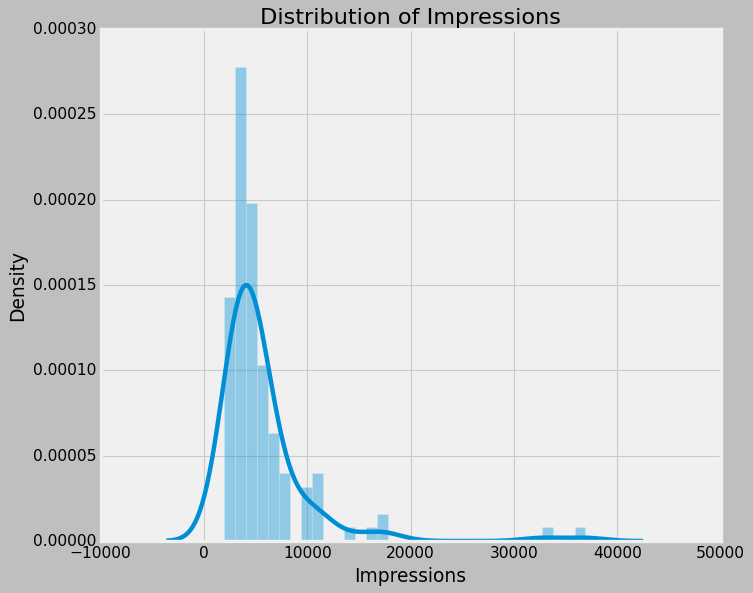

In [86]:
# disribution of impressions
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title('Distribution of Impressions')
sns.distplot(instagram_data['Impressions'])
plt.show()

<ipython-input-87-ac21158661c6>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




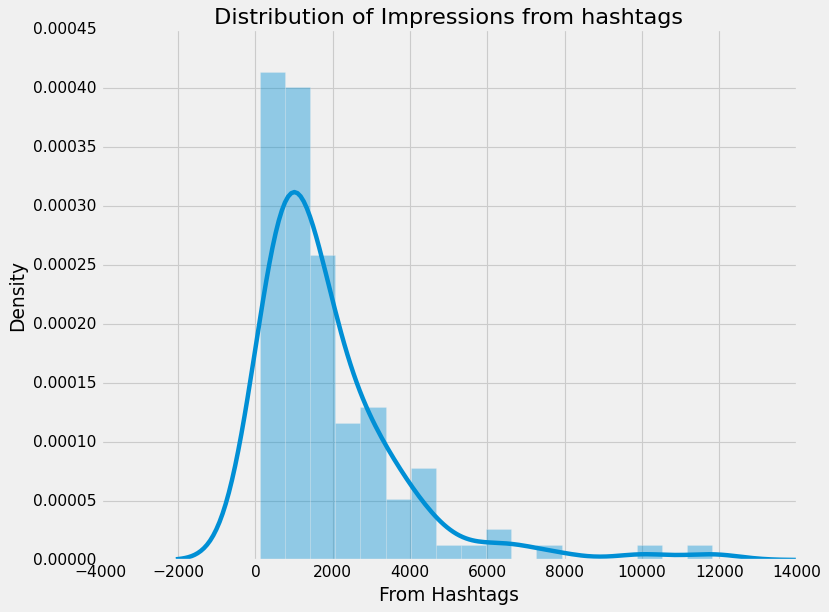

In [87]:
plt.figure(figsize=(10,8))
# plt.style.use('fivethirtyeight')
plt.title('Distribution of Impressions from hashtags')
sns.distplot(instagram_data['From Hashtags'])
plt.show()

<ipython-input-88-8fc84541a365>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




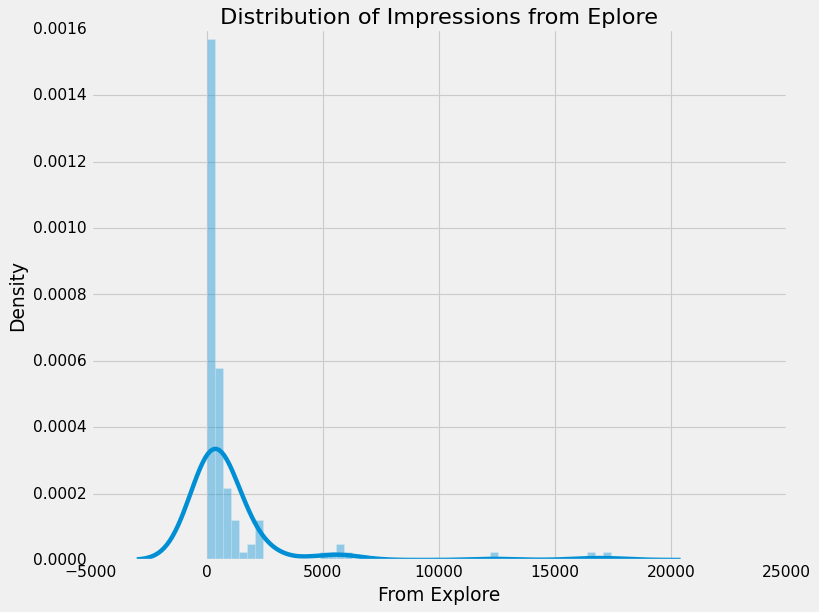

In [88]:
plt.figure(figsize=(10,8))
# plt.style.use('fivethirtyeight')
plt.title('Distribution of Impressions from Eplore')
sns.distplot(instagram_data['From Explore'])
plt.show()

In [89]:
home = instagram_data['From Home'].sum()
hashtags = instagram_data['From Hashtags'].sum()
explore = instagram_data['From Explore'].sum()
other = instagram_data['From Other'].sum()
labels = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
values = [home, hashtags, explore, other]

In [90]:
fig = px.pie(instagram_data, values=values, names=labels, title='Source of Posts')
fig.show()

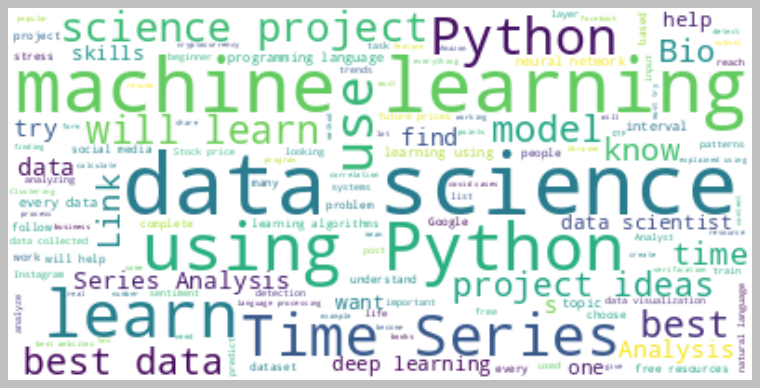

In [91]:
# lets check most used words
text = ' '.join(i for i in instagram_data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

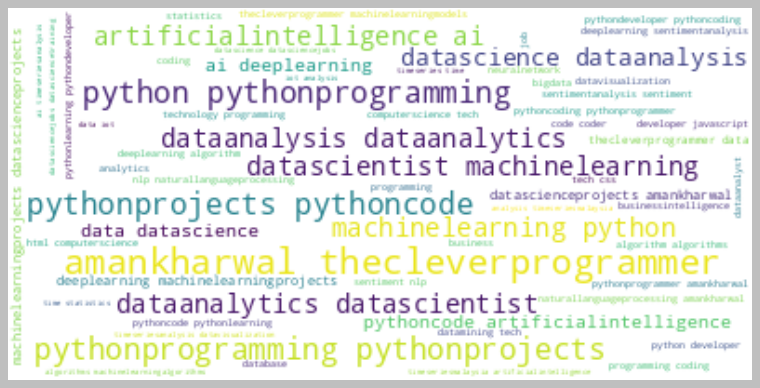

In [92]:
# checking most sued hastags
text = ' '.join(i for i in instagram_data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [93]:
# Analysing relationships
figure = px.scatter(data_frame = instagram_data, x="Impressions",
                    y="Likes", size="Impressions", trendline="ols",
                    title = "Relationship Between Impressions and Likes")
figure.show()


In [94]:
figure = px.scatter(data_frame = instagram_data, x="Impressions",
                    y="Comments", size="Impressions", trendline="ols",
                    title = "Relationship Between Impressions and Comments")
figure.show()

In [95]:
figure = px.scatter(data_frame = instagram_data, x="Impressions",
                    y="Shares", size="Impressions", trendline="ols",
                    title = "Relationship Between Impressions and Shares")
figure.show()

In [96]:
figure = px.scatter(data_frame = instagram_data, x="Impressions",
                    y="Saves", size="Impressions", trendline="ols",
                    title = "Relationship Between Impressions and Saves")
figure.show()

In [97]:
# checking for the correlation between them
numerical_features = instagram_data.select_dtypes(include=np.number)
correlation = numerical_features.corr()
print(correlation['Impressions'].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [98]:
# conversion rate
instagram_data['Conversion Rate'] = (instagram_data['Follows']/instagram_data['Profile Visits'])*100

In [99]:
instagram_data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Conversion Rate
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,5.714286
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,20.833333
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,19.354839
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,34.782609
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,0.000000


In [100]:
# no. of profile visist and profile gain
figure = px.scatter(data_frame = instagram_data, x="Profile Visits",
                    y="Follows", size="Profile Visits", trendline="ols",
                    title = "Relationship Between Profile Visits and Profile Gain")
figure.show()

In [101]:
# prediction model
x = np.array(instagram_data[['Likes', 'Saves', 'Comments', 'Shares' , 'Profile Visits', 'Follows']])
y = np.array(instagram_data['Impressions'])
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [102]:
model = PassiveAggressiveClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)
# comes 83% accuracy

0.0

In [103]:
features = np.array([[282.0, 233, 4, 9, 165, 54]])

In [ ]:
model.predict(features)